<a href="https://colab.research.google.com/github/monika0123/linear-Regression/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [0]:
#load data for train and test
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [0]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [0]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [0]:
#shape of train dataset
train.shape

(700, 2)

In [0]:
# shape of test dataset
test.shape

(300, 2)

In [0]:
#check data type of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.1 KB


In [0]:
#check missing values with 'isnull' command
train.isnull().any()

x    False
y     True
dtype: bool

In [0]:
# count how many missing value is in this attributes
train['y'].isnull().sum()


1

two ways of handling missing values is :
1. Remove Rows with missing values
2. imputting missing values with mean,median and mode values of the column

In [0]:
# remove row of with missing values
train=train.dropna()

In [0]:

print(train.isnull().any())

x    False
y    False
dtype: bool


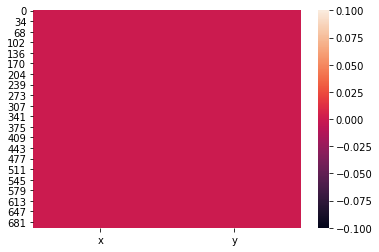

In [0]:
sb.heatmap(train.isnull())
plt.show()

In [0]:
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


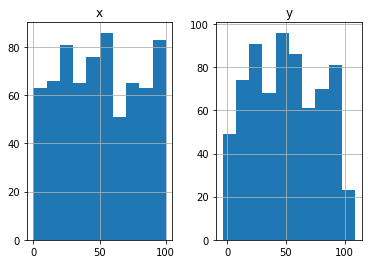

In [0]:
train.hist()
plt.show()

In [0]:
x=train.x.values
y=train.y.values

In [0]:
def mean(num):
  return sum(num)/float(len(num))

def varience(num,mean):
  return sum([abs(x-mean)**2 for x in num])

In [0]:
x_mean,y_mean=mean(x),mean(y)
x_varience=varience(x,x_mean)
y_varience=varience(y,y_mean)

In [0]:
def covarience(x, x_mean, y, y_mean):
    ln = len(x)
    cov = 0.0
    for i in range(ln):
        cov += ((x[i] - x_mean) * (y[i] - y_mean))
    return cov

In [0]:
def coefficients():
    m = covarience(x, x_mean, y, y_mean) / varience(x, x_mean)
    b = y_mean - (m*x_mean)
    return [m,b]

In [0]:
x_test = test['x'].values.reshape(-1, 1)
y_test = test['y'].values.reshape(-1, 1)

In [0]:
def simple_linear_regression():
    prediction = list()
    m, c = coefficients()
    for test in x_test:
        y_pred = m*test[0] + c
        prediction.append(y_pred)
    return prediction

In [0]:
predict = simple_linear_regression()

In [0]:
print(predict)

[76.9432759386344, 20.906518554681345, 21.90717493653765, 19.90586217282504, 35.91636428252591, 14.902580263543518, 61.93343021078983, 94.95509081204789, 19.90586217282504, 4.8960164449804715, 3.8953600631241674, 18.905205790968736, 95.95574719390419, 61.93343021078983, 35.91636428252591, 14.902580263543518, 64.93539935635874, 13.901923881687214, 86.94983975719745, 68.93802488378397, 88.95115252091006, 50.92621001037048, 88.95115252091006, 26.910456845819173, 96.95640357576049, 57.93080468336461, 78.944588702347, 20.906518554681345, 92.95377804833528, 26.910456845819173, 98.9577163394731, 30.91308237324439, 32.914395136957, 79.94524508420331, 27.91111322767548, 46.923584482945266, 52.927522774083094, 68.93802488378397, 27.91111322767548, 32.914395136957, 90.95246528462266, 70.93933764749657, 49.92555362851418, 75.9426195567781, 3.8953600631241674, 36.91702066438222, 69.93868126564027, 67.93736850192766, 39.91898980995113, 34.91570790066961, 93.95443443019158, 87.95049613905375, 51.9268